# Desarrollo Certamen 1

P1: $$
\left[
\begin{array}{cc}
 I   & A \\   
 A^T & 0 \\
\end{array} \right]
\left[
\begin{array}{c}
 r \\   
 x \\
\end{array} \right]
=
\left[
\begin{array}{c}
 b \\   
 0 \\
\end{array} \right]
$$

a) Inmediatamente tenemos:
$$
r + Ax = b, \qquad A^Tr = 0
$$
Luego, encontramos que
$$
r = b - Ax
$$
es el vector _residual_, o simplemente, _residuo_ del sistema $Ax=b$.

b) De lo anterior,
$$
A^Tr + A^TA x = A^T b 
$$
implica necesariamente que
$$
x = (A^TA)^{-1}A^T b = A^\dagger b
$$
Se trata de la _ecuación normal_ discutida en clases, donde $A^\dagger$ es la llamada _pseudo-inversa de Moore-Penrose_, y la encontramos durante la resolución del problema de ajuste por mínimos cuadrados, que escribimos como minimizar
$$
J(x) = ||Ax - b||^2_2
$$
en la sección de _ajuste multilineal_.

---

P2:

a) Tenemos $$
A = 
\left[
\begin{array}{cc}
 2   & 1 \\   
 \alpha& 2 \\
\end{array} \right]
$$

El único valor admisible es $\alpha=1$, ya que, por construcción, $LL^T$ es una matriz simétrica y positivo-definida. Un cálculo rápido con
$$
L = 
\left[
\begin{array}{cc}
 l_{11}   & 0 \\   
 l_{21} & l_{22} \\
\end{array} \right]
$$
mediante el desarrollo del producto $A=LL^T$, nos lleva inmediatamente a que $l_{11}^2 = 2, l_{11}\cdot l_{21} = \alpha = 1$, y $l_{21}^2+l_{22}^2 = 2$, lo cual implica
$$
L = 
\left[
\begin{array}{cc}
 \sqrt{2}   & 0 \\   
 1/\sqrt{2} & \sqrt{3/2} \\
\end{array} \right]
$$


In [5]:
# En efecto,
using LinearAlgebra

A = [2 1;1 2];
L = [√2 0;1/√2 √(3/2)];

norm(L*L' - A)

6.280369834735101e-16

b) El problema con la factorización de Cholesky se convierte en resolver $Ax=L(L^T x)=b$, es decir, $Ly=b$ y $L^Tx = y$. Resolvemos primero el segundo:
$$
\left[
\begin{array}{cc}
 \sqrt{2}   & 0 \\   
 1/\sqrt{2} & \sqrt{3/2} \\
\end{array} \right]
\left[\begin{array}{c} y_1 \\ y_2 \end{array}\right] 
=
\left[\begin{array}{c} 0 \\ \beta \end{array}\right] 
$$
de donde se desprende inmediatamente que $y_1=0$ y luego $y_1/\sqrt{2} + y_2\sqrt{3/2}=\beta$ implica $y_2 = \beta\sqrt{2/3}$. El procedimiento se llama "_substitución hacia adelante_", ya que comenzamos desde la primera fila y vamos avanzando, resolviendo fila por fila las incógnitas, una por una.

El paso siguiente es resolver $L^T x = y$, para lo cual utilizamos el método de "_substitución retrógrada_":
$$
\left[
\begin{array}{cc}
 \sqrt{2}   & 1/\sqrt{2} \\   
 0 & \sqrt{3/2} \\
\end{array} \right]
\left[\begin{array}{c} x_1 \\ x_2 \end{array}\right] 
=
\left[\begin{array}{c} 0 \\ \beta\sqrt{2/3} \end{array}\right] 
$$
de donde obtenemos que
$$
x_2 = 2\beta/3 \qquad \Rightarrow \qquad x_1\sqrt{2} + 2\beta/3 /\sqrt{2} = 0
$$
se tiene que $x_1=-\beta/3$. Finalmente, la solución es 
$$
x = \frac{\beta}{3}\left[\begin{array}{r} -1 \\ 2 \end{array}\right] 
$$

In [10]:
using Symbolics

@variables β
A*β/3*[-1;2] - [0;β]

2-element Vector{Num}:
 0
 0

---

P3:

Tenemos la tabla 

|x | 0.0 | a | 0.0 |
|---|---|---|---|
|y | 0 | a |2a |

a) La spline (cúbica) se construye pegando dos curvas cúbicas. En este caso, tenemos dos tramos: $[0,a]$ y $[a,2a]$. Para el primer tramo tenemos
$$
s_1(x) = c_1x + c_2x^2 + c_3x^3
$$
y para el segundo (**que no es requisito para este ejercicio, pero igualmente se desarrolla aquí**):
$$
s_2(x) = d_0 + d_1(x-a) + d_2(x-a)^2 + d_3(x-a)^3
$$
Usamos $(x-a)$ por conveniencia, ya que $s_2$ comienza en $x=a$.

Tenemos el siguiente conjunto de ecuaciones:
$$
\begin{array}{lcl}
s_1(0)=0 \, \Rightarrow \, & \, OK & \\
s_1(a)=a \, \Rightarrow c_1a + c_2a^2 + c_3a^3 = a \, \Rightarrow & \, c_1 + c_2a + c_3a^2 = 1 & \\
s_2(a)=a \, \Rightarrow d_0 = a & \, OK & \\
s_2(2a)=0 \, \Rightarrow d_0 + d_1a + d_2a^2 + d_3a^3 = 0 \, \Rightarrow & \, 1 + d_1 + d_2a + d_3a^2 = 0 & \\
\end{array}
$$

Las condiciones sobre las derivadas dicen:
$$
\begin{array}{lcl}
s_1'(0)=0 \, \Rightarrow \, \left. c_1 + 2c_2x + 3c_3x^2\right|_{x=0}=0 & \, c_1=0 & \\
s_1'(a)=s_2'(a)=0 \, \Rightarrow 2c_2a^2 + 3c_3a^2 = \left. d_1 + 2d_2(x-a) + 3d_3(x-a)^2\right|_{x=a} = 0 \, \Rightarrow & \, 2c_2a^2 + 3c_3a^2 = d_1 = 0 & \Rightarrow c_2 = -3ac_3/2 \\
s_2'(2a)=0 \, \Rightarrow \left. d_1 + 2d_2(x-a) + 3d_3(x-a)^2\right|_{x=2a} = 0 \, \Rightarrow & \,2d_2a + 3d_3a^2 = 0 & \Rightarrow d_2 = -3ad_3/2 \\
\end{array}
$$

De esta manera, combinando con las condiciones descritas arriba:
$$
    c_1 + c_2a + c_3a^2 = 1 \, \Leftrightarrow \, a^2c_3(-3/2 + 1) = 1 \, \Rightarrow c_3 = -2/a^2
$$
entonces, $c_2 = 3/a$. Por el otro lado,
$$
1+ d_1 + d_2a + d_3a^2 = 0 \, \Leftrightarrow \, 1 + a^2 d_3(-3/2 +1) =0 \, \Rightarrow d_3 = 2/a^2
$$
Así, determinamos que $d_2 = -3/a$.

Finalmente,
$$
s_1(x) = \frac{3}{a}x^2 - \frac{2}{a^2}x^3
$$

y
$$
s_2(x) = a - \frac{3}{a}(x-a)^2 + \frac{2}{a^2}(x-a)^3
$$

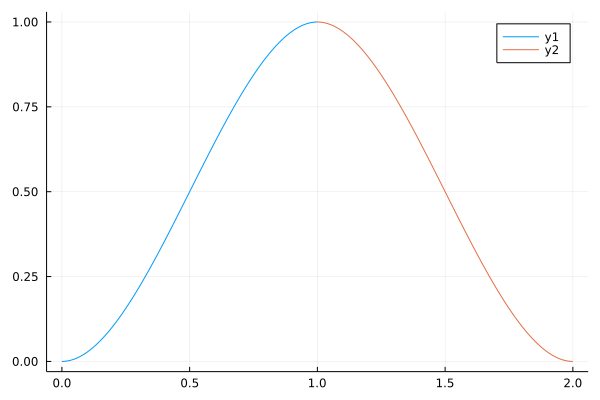

In [28]:
a = 1
s₁(x) = 3/a.*x.^2 .- 2*x.^3/a^2
s₂(x) = a .- 3/a*(x.-a).^2 + 2/a^2*(x.-a).^3 

using Plots
x1 = 0:0.01:a
x2 = a:0.01:2a
p = plot(x1,s₁(x1))
plot!(p,x2,s₂(x2))

b) Para el polinomio de Lagrange, podemos notar que solo nos sirve el nodo central, ya que $y_0=y_2=0$ e $y_1 = a$. Entonces, si $x_0=0$, $x_1=a$, y $x_2=2a$, tenemos que la función base para el nodo central es simplemente, por construcción
$$
l_2(x) = \frac{x-x_0}{x_1-x_0}\cdot\frac{x-x_2}{x_1-x_2} = \frac{x}{a}\cdot\frac{x-2a}{a-2a} = \frac{x(2a-x)}{a^2}
$$

Finalmente,
$$ L(x) = al_2(x) = \frac{x(2a-x)}{a}$$

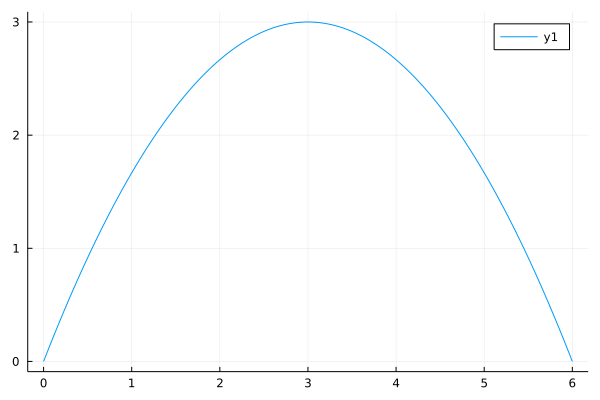

In [35]:
a = 3
l₂(x) = x.*(2a.-x)/a^2
La(x) = a*l₂(x)

using Plots
x = 0:0.01:2a
plot(x,La(x))